# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [2]:
imdb_title = pd.read_csv('Data/imdb.title.principals.csv.gz')
imdb_crew = pd.read_csv('Data/imdb.title.crew.csv.gz')
rating = pd.read_csv('Data/imdb.title.ratings.csv.gz')

# nate's 3 dfs
title_basics_imdb = pd.read_csv('Data/imdb.title.basics.csv.gz')
akas_imdb = pd.read_csv('Data/imdb.title.akas.csv.gz')
name_basics_imdb = pd.read_csv('Data/imdb.name.basics.csv.gz')

In [3]:
akas_imdb.rename(columns = {'title_id':'tconst'}, inplace = True)

In [4]:
name_basics_imdb.drop(['death_year'], axis = 1, inplace=True)
name_basics_imdb.drop(['birth_year'], axis = 1, inplace=True)

In [5]:
# name_basics_imdb['primary_profession'] = name_basics_imdb['primary_profession'].str.split(",").str[:3]

In [6]:
# title_basics_imdb['genres'] = title_basics_imdb['genres'].str.split(',')

In [7]:
# imdb_title['nconst'].nunique(), names['nconst'].nunique()
nconst_merge = imdb_title.merge(name_basics_imdb, on = 'nconst')
imdb_title.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [8]:
# nconst_merge['nconst'] = name_basics_imdb['primary_name']
nconst_merge.isna().sum()

tconst                     0
ordering                   0
nconst                     0
category                   0
job                   850228
characters            634741
primary_name               0
primary_profession     53646
known_for_titles       30467
dtype: int64

In [9]:
nconst_merge.dropna(subset = ['nconst'], inplace = True)
nconst_merge.isna().sum()

tconst                     0
ordering                   0
nconst                     0
category                   0
job                   850228
characters            634741
primary_name               0
primary_profession     53646
known_for_titles       30467
dtype: int64

In [10]:
nconst_merge

,tconst,ordering,nconst,category,job,characters,primary_name,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,Phillippe Warner,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,Xavi Herrero,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [11]:
merged_data = nconst_merge.merge(imdb_crew, on = 'tconst').merge(rating, on = 'tconst').merge(title_basics_imdb, on = 'tconst').merge(akas_imdb, on = 'tconst')
merged_data

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,start_year,runtime_minutes,genres,ordering_y,title,region,language,types,attributes,is_original_title
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,"actress,producer,miscellaneous","tt0315327,tt0092569,tt3216866,tt0102138",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
2,tt5573596,7,nm0001445,actor,NaN,NaN,Martin Landau,"actor,producer,miscellaneous","tt0096316,tt0097123,tt0109707,tt0053125",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
3,tt5573596,1,nm0000925,actor,NaN,NaN,Steven Berkoff,"actor,writer,director","tt0086034,tt0086960,tt1243957,tt0066921",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
4,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,"soundtrack,actor,composer","tt1478964,tt0443706,tt0118749,tt1408253",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,1,Wszystko z nami w porządku,PL,NaN,NaN,NaN,0.0
2422862,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,2,Wszystko z nami w porzadku,NaN,NaN,original,NaN,1.0
2422863,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,3,Мы в порядке,RU,NaN,NaN,NaN,0.0
2422864,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,4,We are alright,US,NaN,NaN,literal English title,0.0


In [12]:
merged_data_cleaned = merged_data.loc[(merged_data['start_year'] >= 2015) & (merged_data['start_year'] <= 2018)]

In [13]:
merged_data_cleaned

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,start_year,runtime_minutes,genres,ordering_y,title,region,language,types,attributes,is_original_title
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,"actress,producer,miscellaneous","tt0315327,tt0092569,tt3216866,tt0102138",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
2,tt5573596,7,nm0001445,actor,NaN,NaN,Martin Landau,"actor,producer,miscellaneous","tt0096316,tt0097123,tt0109707,tt0053125",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
3,tt5573596,1,nm0000925,actor,NaN,NaN,Steven Berkoff,"actor,writer,director","tt0086034,tt0086960,tt1243957,tt0066921",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
4,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,"soundtrack,actor,composer","tt1478964,tt0443706,tt0118749,tt1408253",nm0398271,...,2015,NaN,Comedy,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,1,Wszystko z nami w porządku,PL,NaN,NaN,NaN,0.0
2422862,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,2,Wszystko z nami w porzadku,NaN,NaN,original,NaN,1.0
2422863,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,3,Мы в порядке,RU,NaN,NaN,NaN,0.0
2422864,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,4,We are alright,US,NaN,NaN,literal English title,0.0


In [14]:
merged_data_cleaned.columns

Index(['tconst', 'ordering_x', 'nconst', 'category', 'job', 'characters',
       'primary_name', 'primary_profession', 'known_for_titles', 'directors',
       'writers', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres',
       'ordering_y', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title'],
      dtype='object')

In [15]:
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052058 entries, 0 to 2422865
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   tconst              1052058 non-null  object 
 1   ordering_x          1052058 non-null  int64  
 2   nconst              1052058 non-null  object 
 3   category            1052058 non-null  object 
 4   job                 289255 non-null   object 
 5   characters          414467 non-null   object 
 6   primary_name        1052058 non-null  object 
 7   primary_profession  1028314 non-null  object 
 8   known_for_titles    1040324 non-null  object 
 9   directors           1049557 non-null  object 
 10  writers             988827 non-null   object 
 11  averagerating       1052058 non-null  float64
 12  numvotes            1052058 non-null  int64  
 13  primary_title       1052058 non-null  object 
 14  original_title      1052058 non-null  object 
 15  start_year     

In [16]:
good_films = merged_data_cleaned[(merged_data_cleaned['averagerating'] > 8) & (merged_data_cleaned['numvotes'] > 500)]
good_films.head(2)

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,start_year,runtime_minutes,genres,ordering_y,title,region,language,types,attributes,is_original_title
29136,tt5027774,8,nm0001980,composer,NaN,NaN,Carter Burwell,"composer,music_department,soundtrack","tt1403865,tt2402927,tt0116282,tt5027774",nm1732981,...,2017,115.0,"Crime,Drama",10,"Trys stendai prie Ebingo, Misuryje",LT,NaN,imdbDisplay,NaN,0.0
29137,tt5027774,8,nm0001980,composer,NaN,NaN,Carter Burwell,"composer,music_department,soundtrack","tt1403865,tt2402927,tt0116282,tt5027774",nm1732981,...,2017,115.0,"Crime,Drama",11,"Three Billboards Outside Ebbing, Missouri",GB,en,NaN,NaN,0.0


<ipython-input-17-7aaef63602cb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90)


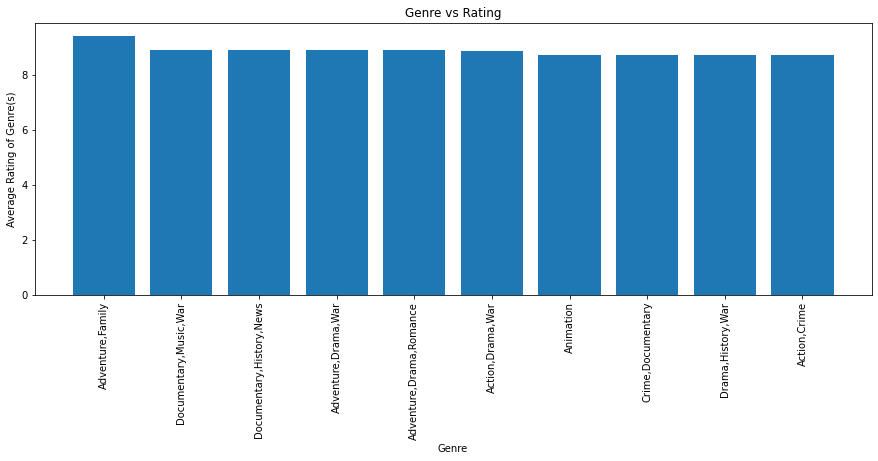

In [17]:
fig, ax = plt.subplots(figsize = (15,5))

x = good_films.groupby('genres').averagerating.mean().sort_values(ascending = False)[:10].index
y = good_films.groupby('genres').averagerating.mean().sort_values(ascending = False)[:10].values

ax.bar(x,y)

ax.set_xlabel('Genre')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel('Average Rating of Genre(s)')
ax.set_title('Genre vs Rating');

In [18]:
good_films.sample(5)

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,start_year,runtime_minutes,genres,ordering_y,title,region,language,types,attributes,is_original_title
534590,tt7738784,8,nm1597868,producer,producer,NaN,Thenappan P.L.,"producer,actor","tt0422908,tt4324054,tt0460976,tt0233422","nm9988436,nm6041686,nm3591496",...,2018,147.0,Drama,1,Peranbu,IN,NaN,NaN,NaN,0.0
471707,tt3170832,1,nm0488953,actress,NaN,"[""Ma""]",Brie Larson,"actress,soundtrack,miscellaneous","tt1714206,tt4154664,tt2370248,tt3170832",nm1049433,...,2015,118.0,"Drama,Thriller",8,Room,FR,NaN,imdbDisplay,NaN,0.0
2374345,tt6432808,8,nm8736057,composer,NaN,NaN,Ana Dubyk,composer,tt6432808,nm2447902,...,2016,80.0,Documentary,5,Planeta Petrila,RO,NaN,NaN,NaN,0.0
130474,tt2119532,9,nm0192984,producer,producer,NaN,Paul Currie,"producer,director,assistant_director","tt5813366,tt1131724,tt2119532,tt0316353",nm0000154,...,2016,139.0,"Biography,Drama,History",22,Hacksaw Ridge - aseeton sotilas,FI,NaN,imdbDisplay,NaN,0.0
731246,tt4016934,2,nm1978402,actor,NaN,"[""Count Fujiwara""]",Jung-woo Ha,"actor,writer,director","tt0497986,tt1190539,tt1230385,tt4016934",nm0661791,...,2016,145.0,"Drama,Romance,Thriller",4,Alkhademah,EG,ar,imdbDisplay,NaN,0.0


In [19]:
directors = good_films[good_films['category'] == 'director']
directors.head()

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,start_year,runtime_minutes,genres,ordering_y,title,region,language,types,attributes,is_original_title
29423,tt5027774,5,nm1732981,director,NaN,NaN,Martin McDonagh,"writer,director,producer","tt0780536,tt0425458,tt5027774,tt1931533",nm1732981,...,2017,115.0,"Crime,Drama",10,"Trys stendai prie Ebingo, Misuryje",LT,NaN,imdbDisplay,NaN,0.0
29424,tt5027774,5,nm1732981,director,NaN,NaN,Martin McDonagh,"writer,director,producer","tt0780536,tt0425458,tt5027774,tt1931533",nm1732981,...,2017,115.0,"Crime,Drama",11,"Three Billboards Outside Ebbing, Missouri",GB,en,NaN,NaN,0.0
29425,tt5027774,5,nm1732981,director,NaN,NaN,Martin McDonagh,"writer,director,producer","tt0780536,tt0425458,tt5027774,tt1931533",nm1732981,...,2017,115.0,"Crime,Drama",12,Three Billboards,XWW,en,NaN,informal short title,0.0
29426,tt5027774,5,nm1732981,director,NaN,NaN,Martin McDonagh,"writer,director,producer","tt0780536,tt0425458,tt5027774,tt1931533",nm1732981,...,2017,115.0,"Crime,Drama",1,3 anuncios por un crimen,AR,NaN,imdbDisplay,NaN,0.0
29427,tt5027774,5,nm1732981,director,NaN,NaN,Martin McDonagh,"writer,director,producer","tt0780536,tt0425458,tt5027774,tt1931533",nm1732981,...,2017,115.0,"Crime,Drama",13,Tres anuncios en las afueras,ES,NaN,imdbDisplay,NaN,0.0


<ipython-input-20-bab648b869d5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90)


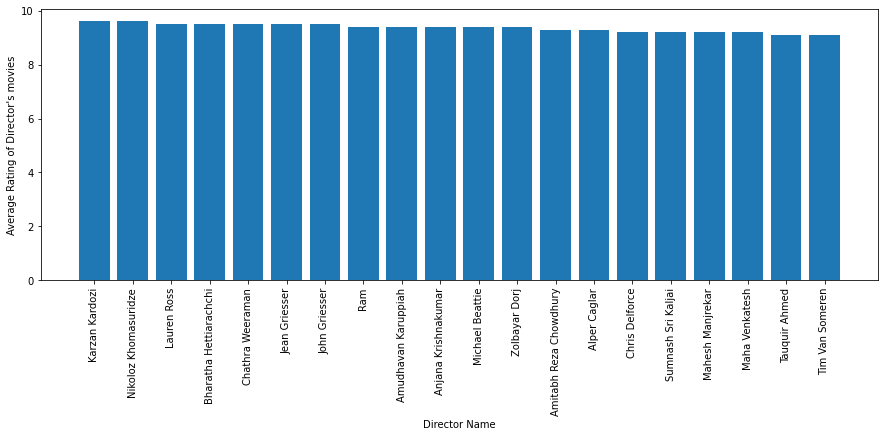

In [20]:
fig, ax = plt.subplots(figsize = (15,5))

x = directors.groupby('primary_name').averagerating.mean().sort_values(ascending = False)[:20].index
y = directors.groupby('primary_name').averagerating.mean().sort_values(ascending = False)[:20].values

ax.bar(x,y)
ax.set_xlabel('Director Name')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Average Rating of Director's movies");